In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [2]:
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

In [17]:
# source: https://www.kaggle.com/kimjihoo/coronavirusdataset#PatientInfo.csv
kdf = pd.read_csv('coronavirusdataset_southKorea/PatientInfo.csv')

In [18]:
kdf.describe()

,patient_id,global_num,birth_year,infection_order,infected_by,contact_number
count,2.218000e+03,1314.000000,1764.000000,42.000000,4.690000e+02,411.000000
mean,4.014678e+09,4664.816591,1974.988662,2.285714,2.600789e+09,24.128954
std,2.192419e+09,2874.044464,19.412643,1.254955,1.570638e+09,91.087792
min,1.000000e+09,1.000000,1916.000000,1.000000,1.000000e+09,0.000000
25%,1.700000e+09,1908.500000,1962.000000,1.250000,1.200000e+09,2.000000
50%,6.001000e+09,5210.500000,1974.500000,2.000000,2.000000e+09,5.000000
75%,6.004000e+09,7481.500000,1993.000000,3.000000,4.100000e+09,16.000000
max,7.000000e+09,8717.000000,2020.000000,6.000000,6.113000e+09,1160.000000


In [32]:
kdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 18 columns):
patient_id            2218 non-null int64
global_num            1314 non-null float64
sex                   2073 non-null object
birth_year            1764 non-null float64
age                   1957 non-null object
country               2218 non-null object
province              2218 non-null object
city                  2153 non-null object
disease               19 non-null object
infection_case        1163 non-null object
infection_order       42 non-null float64
infected_by           2218 non-null int64
contact_number        411 non-null float64
symptom_onset_date    193 non-null datetime64[ns]
confirmed_date        2077 non-null datetime64[ns]
released_date         223 non-null datetime64[ns]
deceased_date         32 non-null datetime64[ns]
state                 2130 non-null object
dtypes: datetime64[ns](4), float64(4), int64(2), object(8)
memory usage: 312.0+ KB


In [31]:
kdf.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,0,75.0,2020-01-22,2020-01-23,2020-02-05,NaT,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,0,31.0,NaT,2020-01-30,2020-03-02,NaT,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17.0,NaT,2020-01-30,2020-02-19,NaT,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,0,9.0,2020-01-26,2020-01-30,2020-02-15,NaT,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2.0,NaT,2020-01-31,2020-02-24,NaT,released


In [10]:
comp = []
for col in kdf.columns:
    comp.append([col, len(kdf[kdf[col].isna()])/len(kdf)])

pd.DataFrame(columns=['col','nan%'], data=comp)

,col,nan%
0,patient_id,0.000000
1,global_num,0.407574
2,sex,0.065374
3,birth_year,0.204689
4,age,0.117674
5,country,0.000000
6,province,0.000000
7,city,0.029306
8,disease,0.991434
9,infection_case,0.475654


In [37]:
k

patient_id                      2000000191
global_num                            7992
sex                                 female
birth_year                            1986
age                                    NaN
country                              Korea
province                       Gyeonggi-do
city                            Bucheon-si
disease                                NaN
infection_case        contact with patient
infection_order                        NaN
infected_by                     2000000167
contact_number                         NaN
symptom_onset_date                     NaT
confirmed_date         2020-03-13 00:00:00
released_date                          NaT
deceased_date                          NaT
state                             isolated
Name: 779, dtype: object

In [42]:
# age preprocessing
kdf['age'] = kdf['age'].str.replace('s','')

In [21]:
kdf['infected_by'] = kdf['infected_by'].fillna(0)
kdf['infected_by'] = kdf['infected_by'].astype('int64')

In [30]:
kdf['confirmed_date'] = pd.to_datetime(kdf['confirmed_date'])
kdf['symptom_onset_date'] = pd.to_datetime(kdf['symptom_onset_date'])
kdf['released_date'] = pd.to_datetime(kdf['released_date'])
kdf['deceased_date'] = pd.to_datetime(kdf['deceased_date'])

In [ ]:
# does the time differ from being confirmed till being released or deceased

In [68]:
kdf['diff_onset_confirmed'] = kdf['confirmed_date'] - kdf['symptom_onset_date']
kdf['diff_conf_recov'] = kdf['released_date'] - kdf['confirmed_date']
kdf['diff_conf_dec'] = kdf['deceased_date'] - kdf['confirmed_date']

In [45]:
kdf.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,diff_onset_confirmed
0,1000000001,2.0,male,1964.0,50,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,0,75.0,2020-01-22,2020-01-23,2020-02-05,NaT,released,1 days
1,1000000002,5.0,male,1987.0,30,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,0,31.0,NaT,2020-01-30,2020-03-02,NaT,released,NaT
2,1000000003,6.0,male,1964.0,50,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17.0,NaT,2020-01-30,2020-02-19,NaT,released,NaT
3,1000000004,7.0,male,1991.0,20,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,0,9.0,2020-01-26,2020-01-30,2020-02-15,NaT,released,4 days
4,1000000005,9.0,female,1992.0,20,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2.0,NaT,2020-01-31,2020-02-24,NaT,released,NaT


In [67]:
kdf['diff_onset_confirmed'].quantile([0.25,0.5,0.75,0.98,1])

0.25    2 days
0.50    3 days
0.75    6 days
0.98   15 days
1.00   27 days
Name: diff_onset_confirmed, dtype: timedelta64[ns]

In [104]:
kdf['diff_onset_confirmed'].mean()

Timedelta('4 days 06:57:49.430051')

In [98]:
c = pd.DataFrame([kdf['diff_onset_confirmed'].quantile([0.25,0.5,0.75,0.98,1])], index=['Time'])

In [99]:
c

,0.25,0.50,0.75,0.98,1.00
Time,2 days,3 days,6 days,15 days,27 days


In [100]:
c.to_clipboard()

Text(0.5, 1.0, 'Time Taken for Confirmation After Symptoms onset')

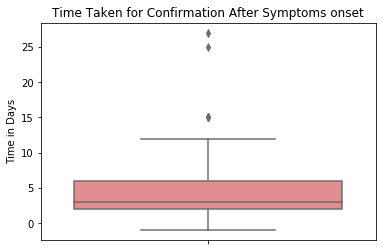

In [84]:
sns.boxplot(y=kdf['diff_onset_confirmed']/np.timedelta64(1, 'D'), data=kdf, color='lightcoral')
plt.ylabel('Time in Days')
plt.title('Time Taken for Confirmation After Symptoms onset')

In [88]:
kdf['diff_conf_recov'].quantile([0.25,0.5,0.75,0.98,1])

0.25   10 days 12:00:00
0.50   13 days 00:00:00
0.75   17 days 00:00:00
0.98   25 days 00:00:00
1.00   32 days 00:00:00
Name: diff_conf_recov, dtype: timedelta64[ns]

In [102]:
kdf['diff_conf_recov'].mean()

Timedelta('13 days 19:54:37.130044')

In [93]:
c = pd.DataFrame([kdf['diff_conf_recov'].quantile([0.25,0.5,0.75,0.98,1])], index=['Time'])

In [95]:
c.to_clipboard()

Text(0.5, 1.0, 'Time Taken for Recovery After Confirmation')

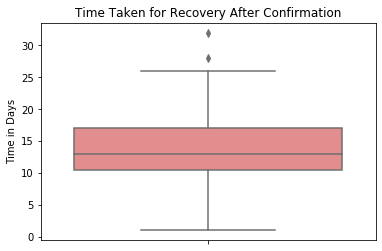

In [83]:
sns.boxplot(y=kdf['diff_conf_recov']/np.timedelta64(1, 'D'), data=kdf, color='lightcoral')
plt.ylabel('Time in Days')
plt.title('Time Taken for Recovery After Confirmation')

In [70]:
kdf['diff_conf_dec'].quantile([0.25,0.5,0.75,0.98,1])

0.25           1 days 00:00:00
0.50           4 days 00:00:00
0.75           6 days 00:00:00
0.98   10 days 03:21:35.999999
1.00          12 days 00:00:00
Name: diff_conf_dec, dtype: timedelta64[ns]

In [101]:
kdf['diff_conf_dec'].mean()

Timedelta('3 days 17:15:00')

Text(0.5, 1.0, 'Time Between Confirmed Case till Being Deceased')

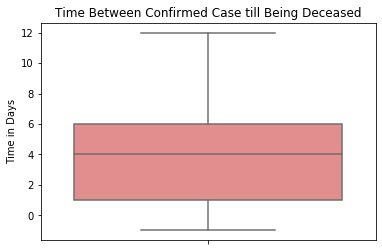

In [82]:
sns.boxplot(y=kdf['diff_conf_dec']/np.timedelta64(1, 'D'), data=kdf, color='lightcoral')
plt.ylabel('Time in Days')
plt.title('Time Between Confirmed Case till Being Deceased')